In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time

from citipy import citipy
from config import weather_api_key
from config import g_key
from datetime import datetime
from scipy.stats import linregress

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
today = time.time()

In [3]:
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

In [5]:
coordinates

[(8.578703979248502, -70.91927990876279),
 (41.12959263010444, -87.18768979697002),
 (40.40729620897295, 87.59846149123689),
 (-46.36330578594402, 81.14731051676785),
 (64.56594583919579, -29.256816522381598),
 (-10.794977576159297, 24.0402067218036),
 (20.80968515490585, -106.71922134356706),
 (54.10927417311228, -21.08317362622202),
 (-80.45914339701605, -124.72135069508545),
 (-88.38220586927193, -43.57881291900122),
 (59.711972600049535, 129.05972756137072),
 (-27.679645632777095, 32.42459142108234),
 (-63.25606305213972, -31.968528046881204),
 (-11.924418827547981, -103.31747726282126),
 (-64.21275683383615, 174.77635116575289),
 (3.5844236347489726, -27.501488792288427),
 (81.71829123786281, -14.233950499144697),
 (32.971362070087324, 94.85268225081956),
 (76.77421445445182, -135.38994931547902),
 (27.58139903760525, -128.77630984470198),
 (-45.89030860144389, 61.10651668996317),
 (-13.135789366470746, -164.54949833925704),
 (20.965094353512683, -94.13091485618445),
 (-28.7136059

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [7]:
cities

['ejido',
 'crown point',
 'korla',
 'mahebourg',
 'olafsvik',
 'mwinilunga',
 'bucerias',
 'vestmannaeyjar',
 'rikitea',
 'ushuaia',
 'mokhsogollokh',
 'lavumisa',
 'mar del plata',
 'puerto ayora',
 'kaitangata',
 'sao filipe',
 'illoqqortoormiut',
 'along',
 'tuktoyaktuk',
 'lompoc',
 'saint-philippe',
 'samusu',
 'mundo nuevo',
 'luderitz',
 'kahului',
 'belushya guba',
 'kapaa',
 'souillac',
 'zhuozhou',
 'hami',
 'butaritari',
 'victoria',
 'dikson',
 'mys shmidta',
 'coihaique',
 'port alfred',
 'pizarro',
 'albany',
 'bathsheba',
 'gubkinskiy',
 'bluff',
 'barrow',
 'sidney',
 'avarua',
 'cidreira',
 'pasighat',
 'jabiru',
 'morden',
 'jepara',
 'hamilton',
 'indian head',
 'hasaki',
 'isla vista',
 'barentsburg',
 'lebu',
 'padang',
 'kimbe',
 'busselton',
 'provideniya',
 'rio novo',
 'amnat charoen',
 'camacha',
 'ilulissat',
 'carnarvon',
 'mataura',
 'castro',
 'bridlington',
 'asfi',
 'taolanaro',
 'maldonado',
 'sentyabrskiy',
 'myre',
 'oudtshoorn',
 'rock sound',
 'por

In [8]:
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
for i, city in enumerate(cities):
    if(i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
    city_url = f"{url}&q={cities[i].replace(' ','+')}"
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ejido
Processing Record 2 of Set 1 | crown point
Processing Record 3 of Set 1 | korla
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | olafsvik
Processing Record 6 of Set 1 | mwinilunga
Processing Record 7 of Set 1 | bucerias
Processing Record 8 of Set 1 | vestmannaeyjar
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mokhsogollokh
Processing Record 12 of Set 1 | lavumisa
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | along
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | samusu
City not found. Skipping...
Processing Record 2

Processing Record 41 of Set 4 | saint george
Processing Record 42 of Set 4 | fremont
Processing Record 43 of Set 4 | mao
Processing Record 44 of Set 4 | bintulu
Processing Record 45 of Set 4 | watsonville
Processing Record 46 of Set 4 | beringovskiy
Processing Record 47 of Set 4 | seoul
Processing Record 48 of Set 4 | hirara
Processing Record 49 of Set 4 | evensk
Processing Record 50 of Set 4 | higuey
City not found. Skipping...
Processing Record 1 of Set 5 | tromso
Processing Record 2 of Set 5 | aljezur
Processing Record 3 of Set 5 | mucurapo
Processing Record 4 of Set 5 | voskresenskoye
Processing Record 5 of Set 5 | sheltozero
Processing Record 6 of Set 5 | hithadhoo
Processing Record 7 of Set 5 | visby
Processing Record 8 of Set 5 | xichang
Processing Record 9 of Set 5 | georgetown
Processing Record 10 of Set 5 | norman wells
Processing Record 11 of Set 5 | halifax
Processing Record 12 of Set 5 | buala
Processing Record 13 of Set 5 | yerofey pavlovich
Processing Record 14 of Set 5 

Processing Record 27 of Set 8 | regina
Processing Record 28 of Set 8 | aden
Processing Record 29 of Set 8 | sataua
City not found. Skipping...
Processing Record 30 of Set 8 | calama
Processing Record 31 of Set 8 | maxixe
Processing Record 32 of Set 8 | natal
Processing Record 33 of Set 8 | sept-iles
Processing Record 34 of Set 8 | kupino
Processing Record 35 of Set 8 | gat
Processing Record 36 of Set 8 | vieques
Processing Record 37 of Set 8 | goderich
Processing Record 38 of Set 8 | moerewa
Processing Record 39 of Set 8 | nijar
Processing Record 40 of Set 8 | moose factory
Processing Record 41 of Set 8 | sergeyevka
Processing Record 42 of Set 8 | clyde river
Processing Record 43 of Set 8 | lagoa
Processing Record 44 of Set 8 | klaksvik
Processing Record 45 of Set 8 | starodub
Processing Record 46 of Set 8 | vila franca do campo
Processing Record 47 of Set 8 | la baule-escoublac
Processing Record 48 of Set 8 | abeche
Processing Record 49 of Set 8 | daru
Processing Record 50 of Set 8 | 

Processing Record 15 of Set 12 | mandera
Processing Record 16 of Set 12 | dubenskiy
City not found. Skipping...
Processing Record 17 of Set 12 | muli
Processing Record 18 of Set 12 | madaripur
Processing Record 19 of Set 12 | abha
Processing Record 20 of Set 12 | lagos
Processing Record 21 of Set 12 | kamariotissa
Processing Record 22 of Set 12 | naze
Processing Record 23 of Set 12 | hvolsvollur
Processing Record 24 of Set 12 | kilindoni
Processing Record 25 of Set 12 | bera
Processing Record 26 of Set 12 | malm
Processing Record 27 of Set 12 | miles city
Processing Record 28 of Set 12 | warqla
City not found. Skipping...
Processing Record 29 of Set 12 | acarau
Processing Record 30 of Set 12 | ondjiva
Processing Record 31 of Set 12 | grand gaube
Processing Record 32 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 33 of Set 12 | tabuk
Processing Record 34 of Set 12 | leh
Processing Record 35 of Set 12 | cottonwood
Processing Record 36 of Set 12 | shreveport
Processing

In [10]:
len(city_data)

572

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ejido,8.5514,-71.2375,71.76,86,99,1.57,VE,2021-04-26 00:11:55
1,Crown Point,41.4170,-87.3653,39.99,56,75,12.66,US,2021-04-26 00:11:55
2,Korla,41.7597,86.1469,47.62,24,22,4.41,CN,2021-04-26 00:11:56
3,Mahebourg,-20.4081,57.7000,77.00,88,75,14.97,MU,2021-04-26 00:08:37
4,Olafsvik,64.8945,-23.7142,39.47,89,11,14.97,IS,2021-04-26 00:11:56


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ejido,VE,2021-04-26 00:11:55,8.5514,-71.2375,71.76,86,99,1.57
1,Crown Point,US,2021-04-26 00:11:55,41.4170,-87.3653,39.99,56,75,12.66
2,Korla,CN,2021-04-26 00:11:56,41.7597,86.1469,47.62,24,22,4.41
3,Mahebourg,MU,2021-04-26 00:08:37,-20.4081,57.7000,77.00,88,75,14.97
4,Olafsvik,IS,2021-04-26 00:11:56,64.8945,-23.7142,39.47,89,11,14.97
5,Mwinilunga,ZM,2021-04-26 00:11:57,-11.7358,24.4293,60.30,90,76,2.95
6,Bucerias,MX,2021-04-26 00:11:57,20.7500,-105.3333,80.01,78,75,12.66
7,Vestmannaeyjar,IS,2021-04-26 00:11:58,63.4427,-20.2734,44.08,80,0,10.00
8,Rikitea,PF,2021-04-26 00:11:58,-23.1203,-134.9692,77.97,75,86,5.95
9,Ushuaia,AR,2021-04-26 00:11:38,-54.8000,-68.3000,48.20,71,75,20.71


In [14]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
today = time.strftime("%x")
today

'04/25/21'

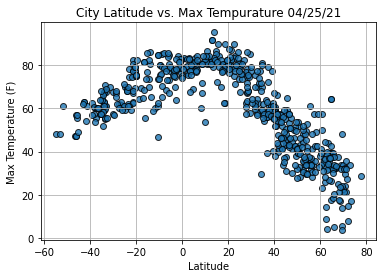

In [17]:
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
plt.title(f"City Latitude vs. Max Tempurature {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show()

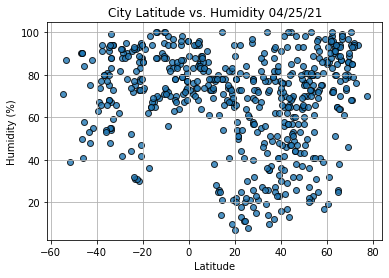

In [18]:
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
plt.title(f"City Latitude vs. Humidity {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")
plt.show()

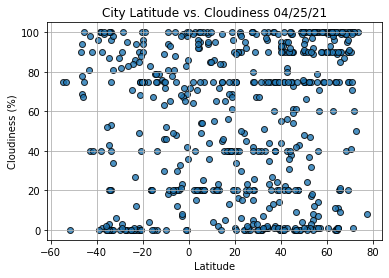

In [19]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
plt.title(f"City Latitude vs. Cloudiness {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")
plt.show()

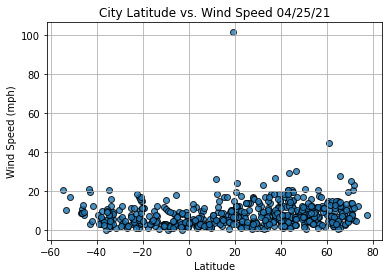

In [20]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
plt.title(f"City Latitude vs. Wind Speed {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")
plt.show()

In [21]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

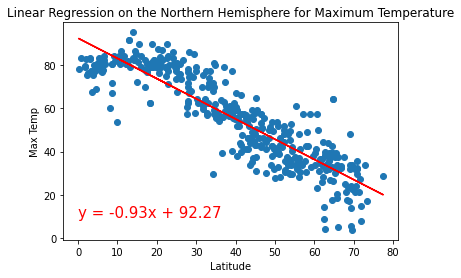

In [27]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,10))

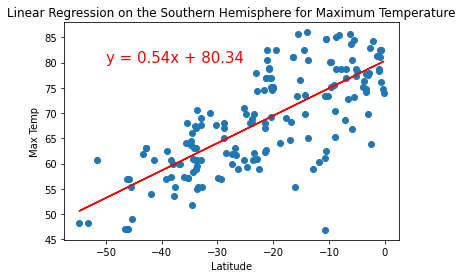

In [28]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

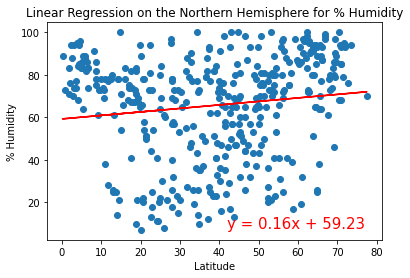

In [29]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(42,8))

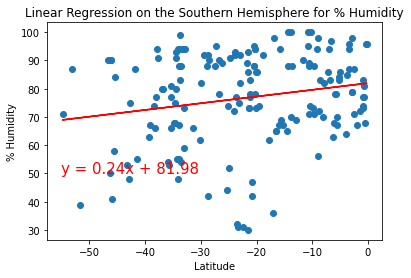

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,50))

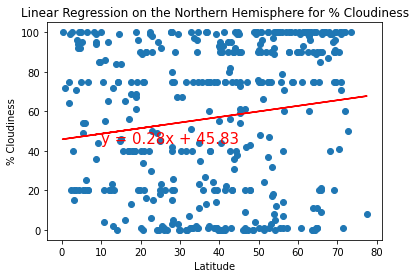

In [31]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,44))

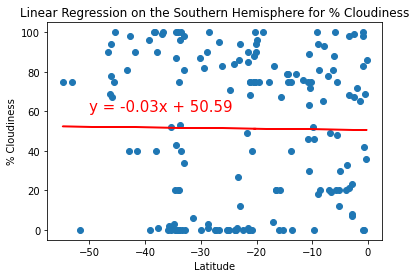

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

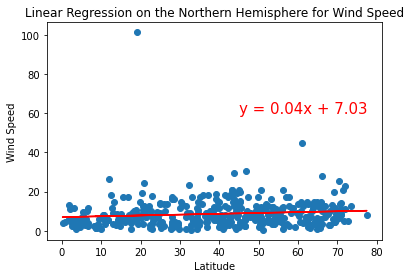

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(45,60))

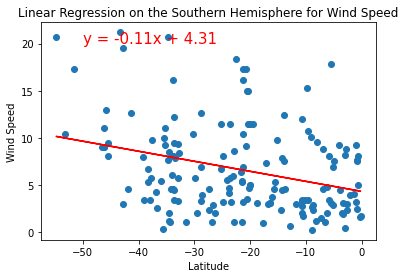

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))